In [61]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn import decomposition

In [62]:
# Function to generate some correlated variables with some Gaussian noise (sigma)
def corr_vars( start=-10, stop=10, step=0.5, mu=0, sigma=3, func=lambda x: x ):
    x = np.arange(start, stop, step)    
    e = np.random.normal(mu, sigma, x.size)
    y = np.zeros(x.size)
    
    for ind in range(x.size):
        y[ind] = func(x[ind]) + e[ind]
    
    return (x,y)

In [63]:
def plot_arrow(ax, start, stop):
    ax.annotate('', xytext=start, xy=stop,                 
                arrowprops=dict(facecolor='red', width=2.0))

In [64]:
np.random.seed(100)

(x1,x2) = corr_vars(start=2, stop=4, step=0.2, sigma=2, func=lambda x: 2*math.sin(x))

A = np.column_stack((x1,x2))

Aorig = A



In [65]:
# f, ax = plt.subplots(figsize=(10,10))
# ax.scatter(A[:,0], A[:,1])
# ax.set_title("Original data")
# ax.set_aspect('equal')
# ax.grid(True)

# plt.xlim([-5,5])
# plt.ylim([-4,4])

In [66]:
# Centering the data
A = (A-np.mean(A,axis=0))

In [67]:
A

array([[-0.9       , -2.12538994],
       [-0.7       ,  1.85789977],
       [-0.5       ,  3.21254412],
       [-0.3       ,  0.08167682],
       [-0.1       ,  2.18816403],
       [ 0.1       ,  0.86622385],
       [ 0.3       , -0.1188428 ],
       [ 0.5       , -3.09562271],
       [ 0.7       , -1.7084864 ],
       [ 0.9       , -1.15816674]])

(-4, 4)

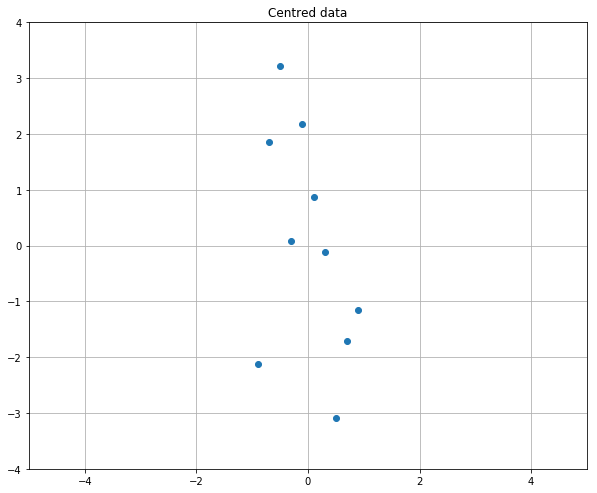

In [68]:
# Plot the Graph Centered

f, ax = plt.subplots(figsize=(10,10))
ax.scatter(A[:,0], A[:,1])
ax.set_title("Centred data")
ax.set_aspect('equal')
ax.grid(True)

plt.xlim([-5,5])
plt.ylim([-4,4])

In [69]:
evecs, eigenvalues, V = np.linalg.svd(A.T, full_matrices=False)

In [70]:
evecs

array([[-0.14027773,  0.9901122 ],
       [ 0.9901122 ,  0.14027773]])

In [71]:
eigenvalues

array([6.19647908, 1.61106079])

In [72]:
#Use the slope to plot the direction of the variance
x = []
y = []
for i in range (-4,4):
    x.append(i)
    y.append(evecs[1,1] * i / evecs[0,1])

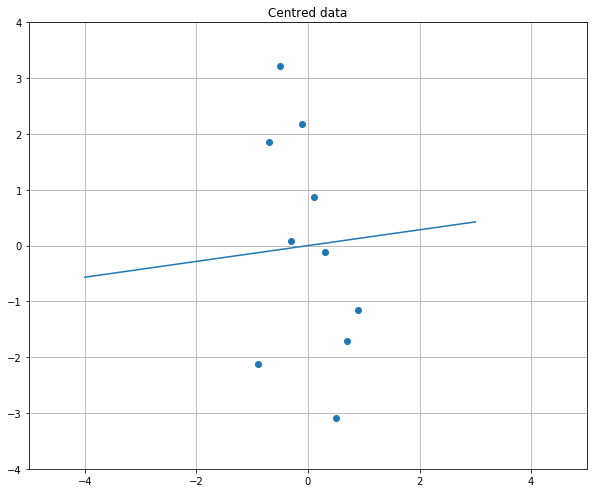

In [73]:
f, ax = plt.subplots(figsize=(10,10))
ax.scatter(A[:,0], A[:,1])
ax.set_title("Centred data")
ax.set_aspect('equal')
ax.grid(True)

plt.xlim([-5,5])
plt.ylim([-4,4])
ax.plot(x, y, linestyle='-')

In [74]:
#Use the slope to plot the direction of the variance
x = []
y = []
for i in range (-4,4):
    x.append(i)
    y.append(evecs[1,0] * i / evecs[0,0])

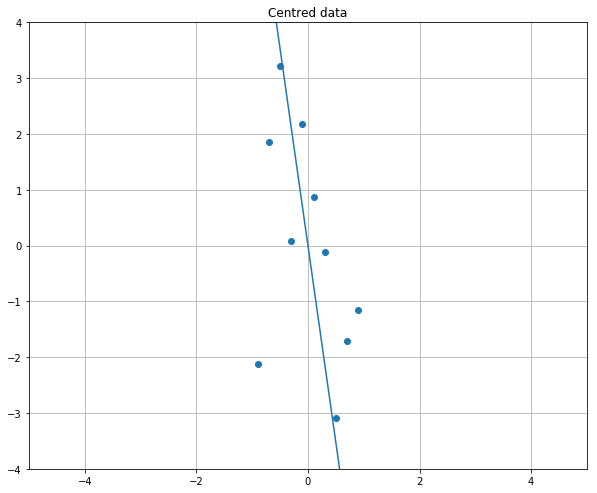

In [75]:
f, ax = plt.subplots(figsize=(10,10))
ax.scatter(A[:,0], A[:,1])
ax.set_title("Centred data")
ax.set_aspect('equal')
ax.grid(True)

plt.xlim([-5,5])
plt.ylim([-4,4])
ax.plot(x, y, linestyle='-')

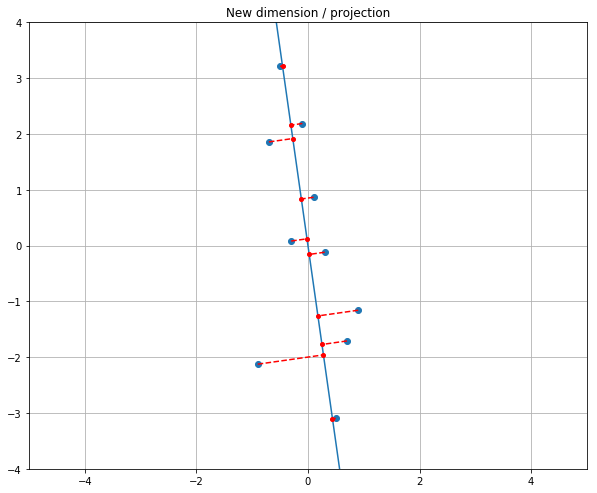

In [76]:
f, ax = plt.subplots(figsize=(10,10))
ax.scatter(A[:,0], A[:,1])
ax.set_title("New dimension / projection")
ax.set_aspect('equal')
ax.grid(True)

plt.xlim([-5,5])
plt.ylim([-4,4])
ax.plot(x, y, linestyle='-')

p0 = [x[0],y[0]]
p1 = [x[len(x)-1],y[len(x)-1]]

a = np.array([[p1[0]-p0[0], p1[1]-p0[1]],
              [p0[1]-p1[1], p1[0]-p0[0]]])

for i in range(0, len(A)):
    q  = A[i]    
    
    b = -np.array([-q[0]*(p1[0]-p0[0]) - q[1]*(p1[1]-p0[1]),
                   -p0[1]*(p1[0]-p0[0])+ p0[0]*(p1[1]-p0[1])])

    proj = np.linalg.solve(a,b)
    
    ax.plot(proj[0],proj[1], 'bo', markersize=4, color='red')
    ax.plot((q[0],proj[0]),(q[1],proj[1]), linestyle='--', color='red')

# Manually compute PCA

(-4, 5)

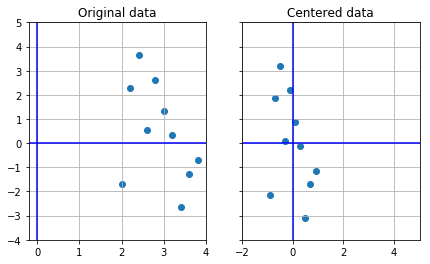

In [77]:
# Centering the Data
A = (A-np.mean(A,axis=0))

# Plot the original matrix
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(7,4))
ax1.scatter(Aorig[:,0], Aorig[:,1])
ax1.set_title("Original data")
ax1.grid(True)

# Plot the centered data
ax2.scatter(A[:,0],A[:,1])
ax2.set_title("Centered data")
ax2.grid(True)

ax1.axhline(0, color="blue")
ax1.axvline(0, color="blue")
ax2.axhline(0, color="blue")
ax2.axvline(0, color="blue")

plt.xlim([-2,5])
plt.ylim([-4,5])

In [78]:
# Sigma
# A.shape[0] = number of observations
S = np.dot(A.T,A)/(A.shape[0]-1)

print("The covariance matrix is:")
print(S,"\n")

The covariance matrix is:
[[ 0.36666667 -0.55248919]
 [-0.55248919  4.18798554]] 



Vector slope:  [-0.]


(-5, 5)

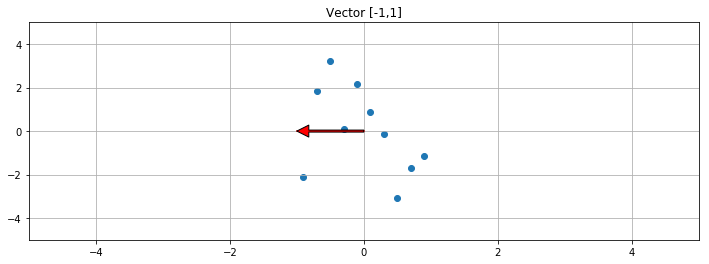

In [79]:
f, ax1 = plt.subplots(1, 1, sharey=True, figsize=(12,4))

#Random Vector and plot it with the data
V = np.array([[-1],[0]])
print("Vector slope: ",V[1]/V[0])
ax1.scatter(A[:,0],A[:,1])
ax1.set_title("Vector [-1,1]")
ax1.grid(True)
ax1.plot([0,V[0]],[0,V[1]],c='r')
plot_arrow(ax1, (0,0),(V[0],V[1]))
plt.xlim([-5,5])
plt.ylim([-5,5])

Vector slope:  [-1.50678871]


(-5, 5)

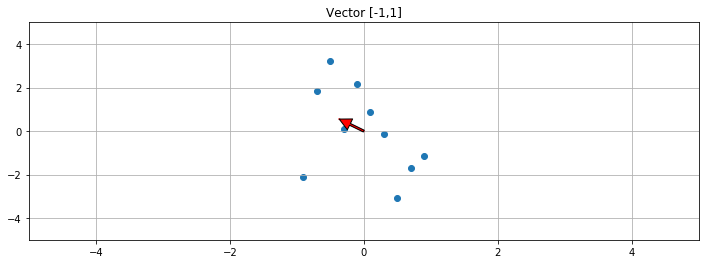

In [80]:
#Multiply the random vector by the covariance matrix. The vector is turned towards the direction of greatest variance
f, ax1 = plt.subplots(1, 1, sharey=True, figsize=(12,4))

V = np.dot(S,V)
print("Vector slope: ",V[1]/V[0])
ax1.scatter(A[:,0],A[:,1])
ax1.set_title("Vector [-1,1]")
ax1.grid(True)
ax1.plot([0,V[0]],[0,V[1]],c='r')
plot_arrow(ax1, (0,0),(V[0],V[1]))

plt.xlim([-5,5])
plt.ylim([-5,5])

Vector slope:  [-5.72313052]


(-5, 5)

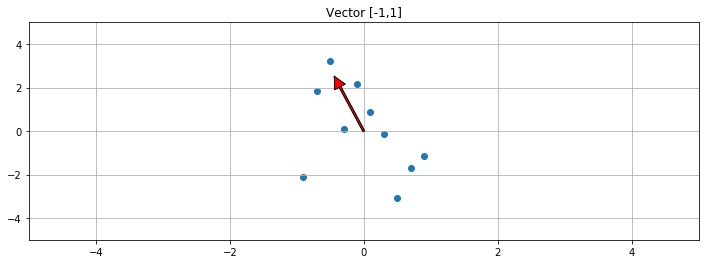

In [81]:
f, ax1 = plt.subplots(1, 1, sharey=True, figsize=(12,4))

V = np.dot(S,V)
print("Vector slope: ",V[1]/V[0])
ax1.scatter(A[:,0],A[:,1])
ax1.set_title("Vector [-1,1]")
ax1.grid(True)
ax1.plot([0,V[0]],[0,V[1]],c='r')
plot_arrow(ax1, (0,0),(V[0],V[1]))

plt.xlim([-5,5])
plt.ylim([-5,5])

Vector slope:  [-6.94911232]


(-5, 5)

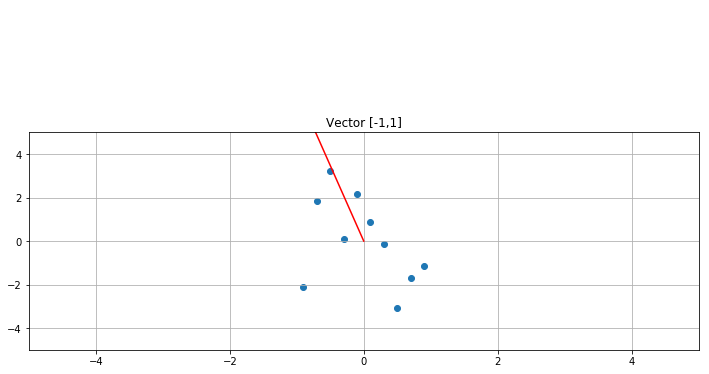

In [82]:
f, ax1 = plt.subplots(1, 1, sharey=True, figsize=(12,4))

V = np.dot(S,V)
print("Vector slope: ",V[1]/V[0])
ax1.scatter(A[:,0],A[:,1])
ax1.set_title("Vector [-1,1]")
ax1.grid(True)
ax1.plot([0,V[0]],[0,V[1]],c='r')
plot_arrow(ax1, (0,0),(V[0],V[1]))

plt.xlim([-5,5])
plt.ylim([-5,5])

In [83]:
print("The slope of the vector converges to the direction of greatest variance:\n")

V = np.dot(S,V)
print("Vector slope: ",V[1]/V[0])
V = np.dot(S,V)
print("Vector slope: ",V[1]/V[0])
V = np.dot(S,V)
print("Vector slope: ",V[1]/V[0])
V = np.dot(S,V)
print("Vector slope: ",V[1]/V[0])
V = np.dot(S,V)
print("Vector slope: ",V[1]/V[0])
V = np.dot(S,V)
print("Vector slope: ",V[1]/V[0])

The slope of the vector converges to the direction of greatest variance:

Vector slope:  [-7.0507464]
Vector slope:  [-7.0577219]
Vector slope:  [-7.05819391]
Vector slope:  [-7.05822582]
Vector slope:  [-7.05822798]
Vector slope:  [-7.05822813]


# Calculating Eigenvalues

det(Correlation Matrix - lambda*I) = 0

In [84]:
# https://en.wikipedia.org/wiki/Eigenvalue_algorithm

l_1 = (S.trace() + np.sqrt(pow(S.trace(),2) - 4*np.linalg.det(S))) / 2
l_2 = (S.trace() - np.sqrt(pow(S.trace(),2) - 4*np.linalg.det(S))) / 2

print("The eigenvalues are:")
print("L1:",l_1)
print("L2:",l_2)

The eigenvalues are:
L1: 4.26626144724024
L2: 0.2883907617113144


In [85]:
# Cayley-Hamilton theorem
# (A - λ1I )(A - λ2I ) = (A - λ2I )(A - λ1I ) = 0

A1 = S - l_1 * np.identity(2)
A2 = S - l_2 * np.identity(2)

E1 = A2[:,1]
E2 = A1[:,0]

E1 = E1 / np.linalg.norm(E1)
E2 = E2 / np.linalg.norm(E2)

print("The eigenvectors are:")
print("E1:", E1)
print("E2:", E2)

The eigenvectors are:
E1: [-0.14027773  0.9901122 ]
E2: [-0.9901122  -0.14027773]


In [26]:
E = np.column_stack((E1,E2))

E

array([[-0.14027773, -0.9901122 ],
       [ 0.9901122 , -0.14027773]])

In [86]:
# Calculating using np function
evals, evecs = np.linalg.eigh(S)

print(evals)
print(evecs)

[0.28839076 4.26626145]
[[-0.9901122  -0.14027773]
 [-0.14027773  0.9901122 ]]


(-4, 5)

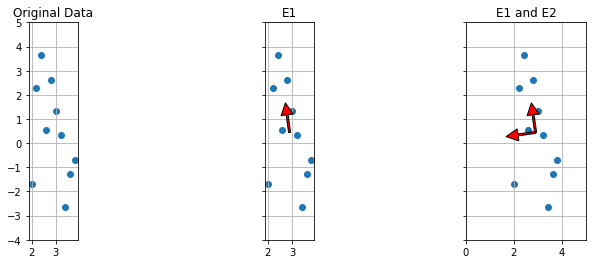

In [87]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(12,4))
ax1.scatter(Aorig[:,0],Aorig[:,1])
ax1.set_title("Original Data")
ax1.grid(True)
ax1.set_aspect('equal')

ax2.scatter(Aorig[:,0],Aorig[:,1])
ax2.set_title("E1")
ax2.grid(True)
plot_arrow(ax2, np.mean(Aorig,axis=0), np.mean(Aorig,axis=0) + np.dot(Aorig, E).std(axis=0).mean() * E1)
ax2.set_aspect('equal')               

ax3.scatter(Aorig[:,0],Aorig[:,1])
ax3.set_title("E1 and E2")
ax3.grid(True)
plot_arrow(ax3, np.mean(Aorig,axis=0), np.mean(Aorig,axis=0) + np.dot(Aorig, E).std(axis=0).mean() * E1)
plot_arrow(ax3, np.mean(Aorig,axis=0), np.mean(Aorig,axis=0) + np.dot(Aorig, E).std(axis=0).mean() * E2)
ax3.set_aspect('equal')               

plt.xlim([0,5])
plt.ylim([-4,5])

# Projecting the Data

In [89]:
#Result from manual calculation
F1 = np.dot(A, E1)
F2 = np.dot(A, E2)

F = np.column_stack((F1, F2))
F

array([[-1.97812455,  1.18924584],
       [ 1.93772363,  0.43245658],
       [ 3.25091797,  0.04440771],
       [ 0.12295254,  0.28557622],
       [ 2.18055566, -0.20793946],
       [ 0.84363103, -0.22052313],
       [-0.15975102, -0.28036266],
       [-3.13515266, -0.06080918],
       [-1.78978762, -0.45341595],
       [-1.27296497, -0.72863598]])

In [88]:
#Out of the box result using scikt learn
pca = decomposition.PCA(n_components=2)
print(pca.fit_transform(A))

[[-1.97812455  1.18924584]
 [ 1.93772363  0.43245658]
 [ 3.25091797  0.04440771]
 [ 0.12295254  0.28557622]
 [ 2.18055566 -0.20793946]
 [ 0.84363103 -0.22052313]
 [-0.15975102 -0.28036266]
 [-3.13515266 -0.06080918]
 [-1.78978762 -0.45341595]
 [-1.27296497 -0.72863598]]


In [90]:
# Link for Pca System ML in GitHub
#https://github.com/apache/systemml/blob/master/scripts/algorithms/PCA.dml